In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import os
import tqdm
import skimage.io
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
train_dataset_0_all = glob.glob('./C-NMC_Leukemia/training_data/fold_0/all/*.bmp')
train_dataset_0_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_0/hem/*.bmp')
train_dataset_1_all = glob.glob('./C-NMC_Leukemia/training_data/fold_1/all/*.bmp')
train_dataset_1_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_1/hem/*.bmp')
train_dataset_2_all = glob.glob('./C-NMC_Leukemia/training_data/fold_2/all/*.bmp')
train_dataset_2_hem = glob.glob('./C-NMC_Leukemia/training_data/fold_2/hem/*.bmp')

#test_dataset  = glob.glob('./C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data')
#valid_dataset = glob.glob('./C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

valid_data    = pd.read_csv('./C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')


In [4]:
a, b, c= len(train_dataset_0_all), len(train_dataset_1_all), len(train_dataset_2_all)
d = a + b + c
print("Total observation:", d)

Total observation: 7272


In [5]:
a, b, c = len(train_dataset_0_hem), len(train_dataset_1_hem), len(train_dataset_2_hem)
d = a + b + c
print("Total observation:", d)

Total observation: 3389


In [6]:
len(valid_data)

1867

In [7]:
A = []
H = []

A.extend(train_dataset_0_all)
A.extend(train_dataset_1_all)
A.extend(train_dataset_2_all)

H.extend(train_dataset_0_hem)
H.extend(train_dataset_1_hem)
H.extend(train_dataset_2_hem)

A = np.array(A)
H = np.array(H)

len(A), len(H)

(7272, 3389)

 80%|████████  | 4/5 [00:00<00:00, 38.24it/s]

100%|██████████| 5/5 [00:00<00:00, 38.01it/s]


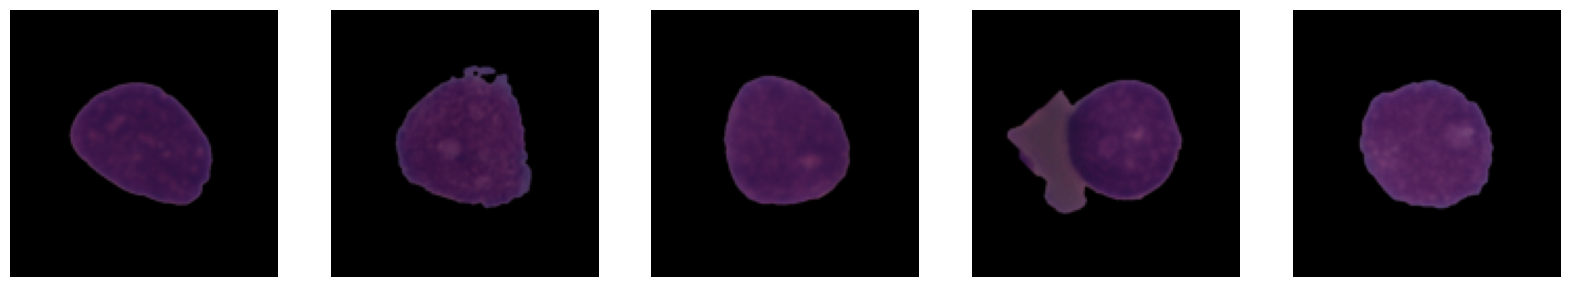

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(A))
    img  = imread(A[rand])
    img  = resize(img, (128,128))
    ax[i].imshow(img)
    ax[i].axis('off')

100%|██████████| 5/5 [00:00<00:00, 43.09it/s]


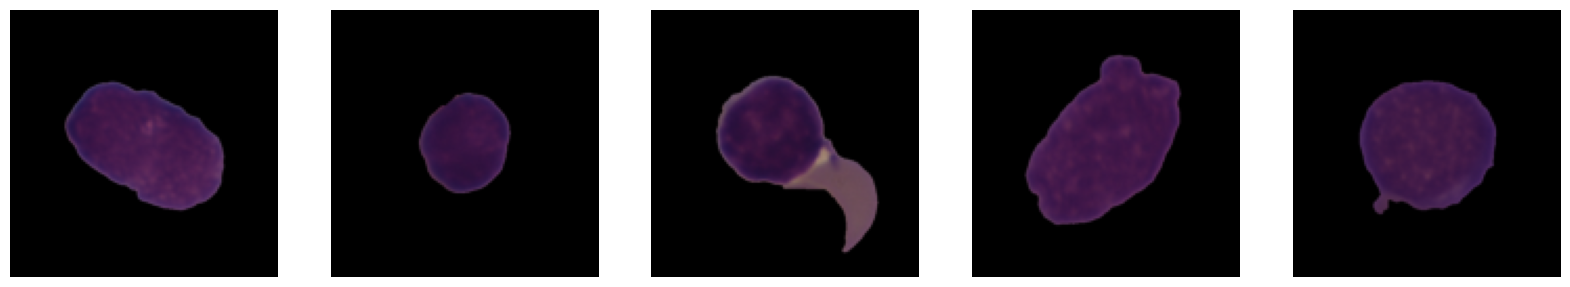

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(H))
    img  = imread(H[rand])
    img  = resize(img, (128,128))
    ax[i].imshow(img)
    ax[i].axis('off')

In [10]:
Image = []
Label = []

for i in tqdm(range(0, len(A))):
    img = imread(A[i])
    img = resize(img, (128,128))
    Image.append(img)
    Label.append(1)

100%|██████████| 7272/7272 [02:30<00:00, 48.40it/s]


In [11]:
for i in tqdm(range(0, len(H))):
    img = imread(H[i])
    img = resize(img, (128,128))
    Image.append(img)
    Label.append(0)

Image = np.array(Image)
Label = np.array(Label)

Image.shape, Label.shape

100%|██████████| 3389/3389 [01:23<00:00, 40.80it/s]


((10661, 128, 128, 3), (10661,))

In [12]:
del A
del H


100%|██████████| 5/5 [00:00<00:00, 61.15it/s]


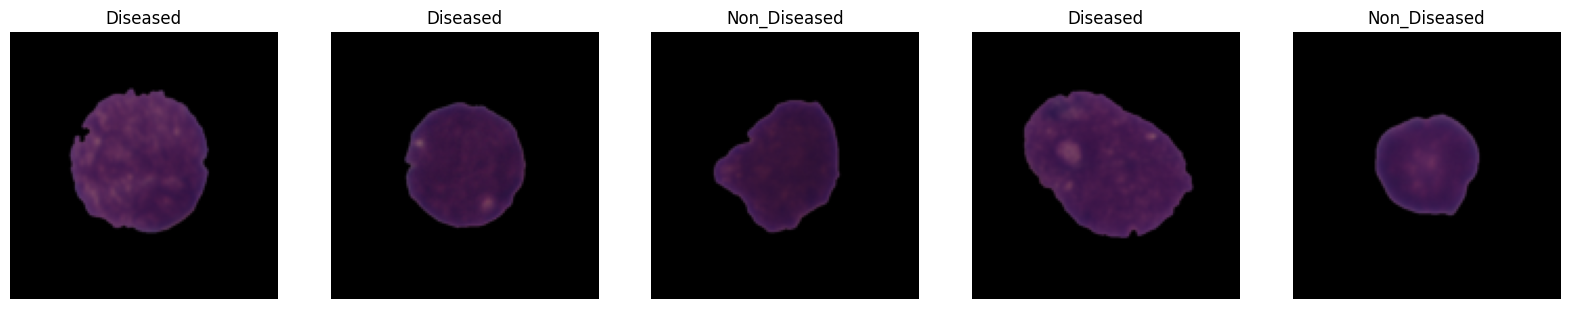

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = Label[rand]
    if a == 1:
        ax[i].set_title('Diseased')
    else:
        ax[i].set_title('Non_Diseased')

In [14]:
X = Image
y = Label

In [15]:
del Image
del Label

In [16]:
valid_data.labels.value_counts()

labels
1    1219
0     648
Name: count, dtype: int64

In [17]:
X_val = []

for image_name in valid_data.new_names:
    # Loading images
    img = imread('./C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/' + image_name)
    # Resizing
    img = resize(img, (128,128))
    # Appending them into list
    X_val.append(img)

In [18]:
X_val = np.array(X_val)


# Storing target values as well
y_val = valid_data.labels.values

In [19]:
train_datagen  = ImageDataGenerator(horizontal_flip=True,
                                    vertical_flip=True,
                                    zoom_range = 0.2)

train_datagen.fit(X)

In [20]:
model = Sequential()

In [21]:
model.add(InputLayer(input_shape = (128,128,3)))


model.add(Conv2D(filters = 32,   kernel_size  = (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64,   kernel_size  = (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128,  kernel_size  = (3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))
model.add(Dropout(0.3))


In [22]:
model.add(Flatten())


model.add(Dense(units = 512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units = 256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(units = 1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [24]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 15)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [26]:
len(X), len(X_val)

(10661, 1867)

In [27]:
model.fit(train_datagen.flow(X, y, batch_size = 512),
          validation_data = (X_val, y_val),
          epochs = 500,
          verbose = 1,
          callbacks = callback_list)

Epoch 1/500
21/21 [==============================] - ETA: 0s - loss: 0.8449 - accuracy: 0.6071
Epoch 1: val_accuracy improved from -inf to 0.34708, saving model to .\best_weights.hdf5


c:\Users\manav\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 223s 10s/step - loss: 0.8449 - accuracy: 0.6071 - val_loss: 0.8553 - val_accuracy: 0.3471
Epoch 2/500
21/21 [==============================] - ETA: 0s - loss: 0.7936 - accuracy: 0.6393
Epoch 2: val_accuracy did not improve from 0.34708
21/21 [==============================] - 219s 10s/step - loss: 0.7936 - accuracy: 0.6393 - val_loss: 1.1232 - val_accuracy: 0.3471
Epoch 3/500
21/21 [==============================] - ETA: 0s - loss: 0.7902 - accuracy: 0.6466
Epoch 3: val_accuracy did not improve from 0.34708
21/21 [==============================] - 204s 10s/step - loss: 0.7902 - accuracy: 0.6466 - val_loss: 1.4792 - val_accuracy: 0.3471
Epoch 4/500
21/21 [==============================] - ETA: 0s - loss: 0.7706 - accuracy: 0.6521
Epoch 4: val_accuracy did not improve from 0.34708
21/21 [==============================] - 217s 10s/step - loss: 0.7706 - accuracy: 0.6521 - val_loss: 1.7876 - val_accuracy: 0.3471
Epoch 5/500
21/21 [===================

In [28]:
model.save('best_weights.hdf5')

In [29]:
from tensorflow.keras.models import load_model

In [30]:
cnn_model = load_model('best_weights.hdf5')

In [31]:
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val)

print(f"Validation Accuracy (CNN Model): {val_accuracy * 100:.2f}%")

59/59 [==============================] - 13s 200ms/step - loss: 2.9969 - accuracy: 0.3471
Validation Accuracy (CNN Model): 34.71%
